In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, getBeh
from trials import markTrials
from bouts import markBouts
from statistics import stdCalc, getStats, getBoutMeans


3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.


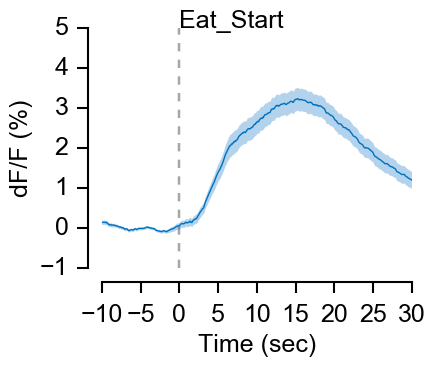

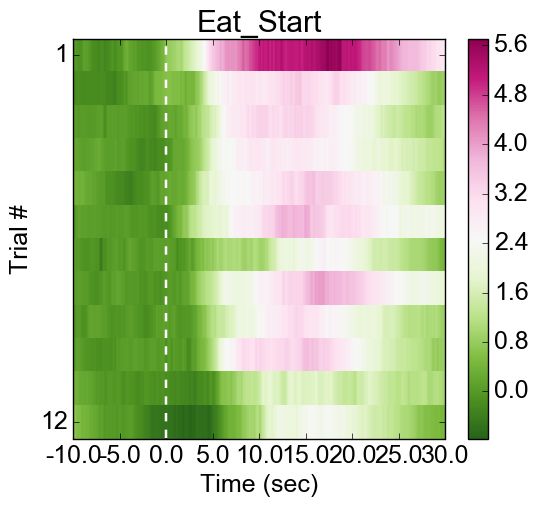

In [49]:
# Start running the analysis
mice = [(8404, 6), (8857, 3), (8864, 1)]
fs = 0.05
base = 10.0
duration = 30.0
behType = 'FR1'
eventType = 'Eat_Start'
trials=[1,12]

# Load the data
fileList = loopMice(mice, behType)
eventsData = markTrials(mice, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, dff=True, baseline=True)

# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(-base,duration,fs)
fig, ax = plotMean(mean, sem, time)
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_all_cell_means_10sec.svg")

fig2, ax2 = plotHeat(eventsData)
fig2.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_all_cell_heatmap_10sec.svg")


3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.


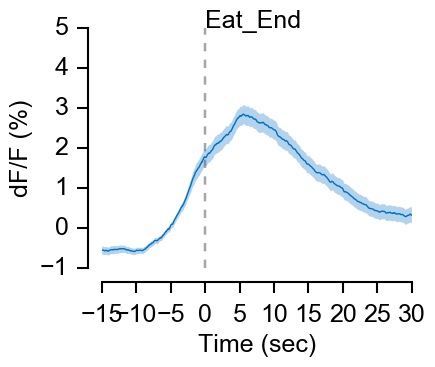

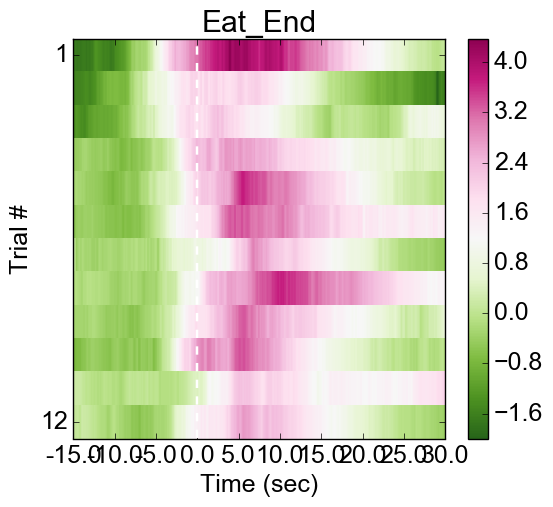

In [38]:
# Start running the analysis
mice = [(8404, 6), (8857, 3), (8864, 1)]
fs = 0.05
base = 15.0
duration = 30.0
behType = 'FR1'
eventType = 'Eat_End'
trials=[1,12]

# Load the data
fileList = loopMice(mice, behType)
eventsData = markTrials(mice, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, dff=True, baseline=True)

# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(-base,duration,fs)
fig, ax = plotMean(mean, sem, time)
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_end_all_cell_means_15sec.svg")

fig2, ax2 = plotHeat(eventsData)
fig2.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_all_cell_heatmap_15sec.svg")


3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.


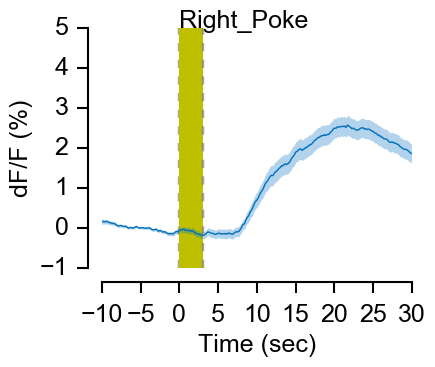

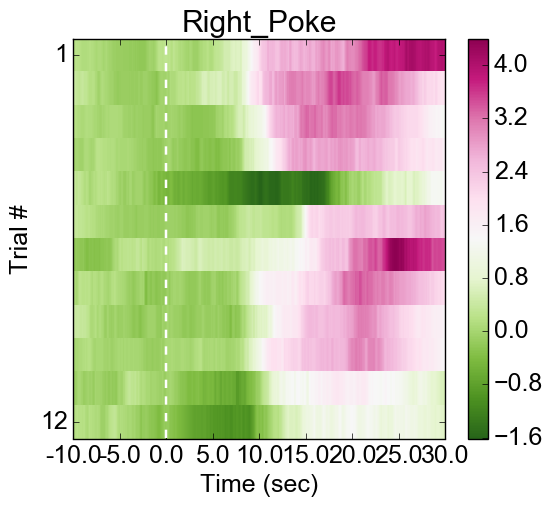

In [39]:
# Start running the analysis
mice = [(8404, 6), (8857, 3), (8864, 1)]
fs = 0.05
base = 10.0
duration = 30.0
behType = 'FR1'
eventType = 'Right_Poke'
trials=[1,12]

# Load the data
fileList = loopMice(mice, behType)
eventsData = markTrials(mice, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, dff=True, baseline=True)

# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(-base,duration,fs)
fig, ax = plotMean(mean, sem, time)
line = 1.5
ax.plot([3.0, 3.0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
ax.fill_between([0.0,3.0], -1, 5, facecolor='y', linewidth=0, alpha=1.0, zorder=-55)
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\right_poke_all_cell_means_10sec.svg")

fig2, ax2 = plotHeat(eventsData)
fig2.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_all_cell_heatmap_10sec.svg")

In [42]:
trialMeans = pd.DataFrame()
for trial in range(trials[0], trials[1]+1):
    dfMeans = pd.DataFrame()
    dfMeans['Mean'] = eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').loc[trial].mean().values
    dfMeans["Sem"] = eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').loc[trial].sem().values
    dfMeans['Trial'] = trial
    trialMeans = trialMeans.append(dfMeans)

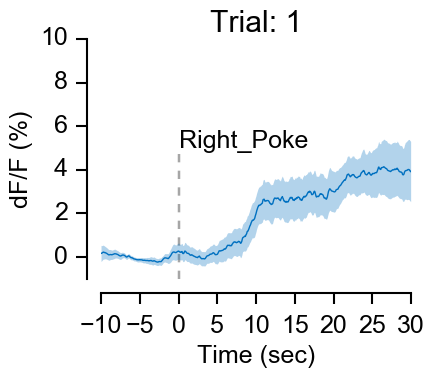

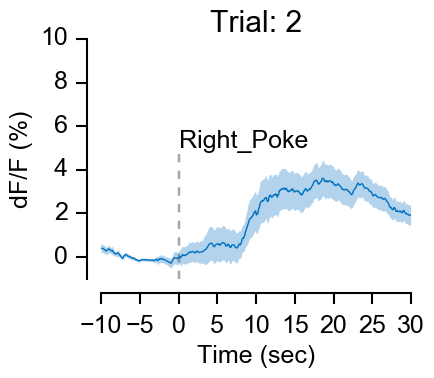

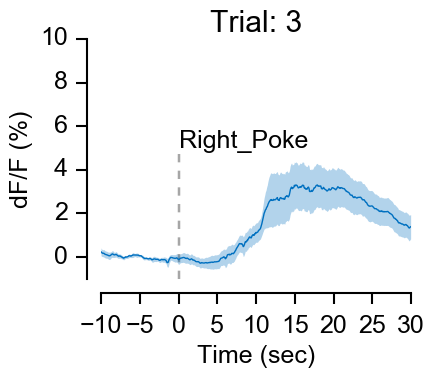

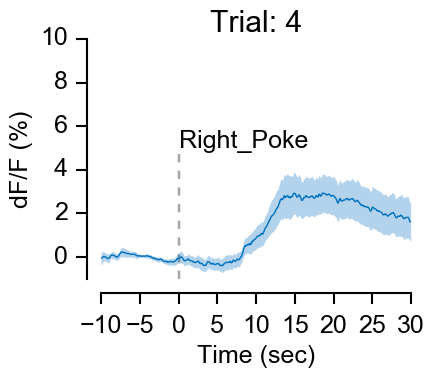

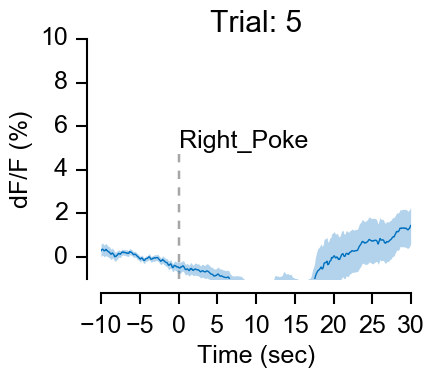

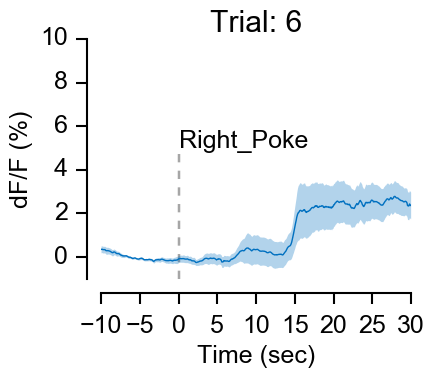

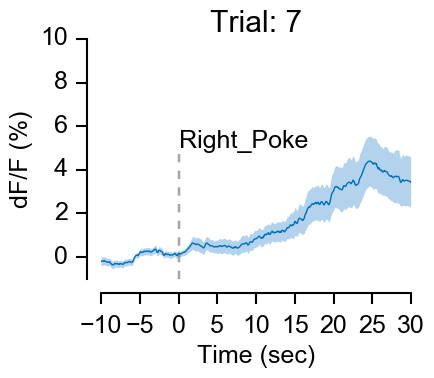

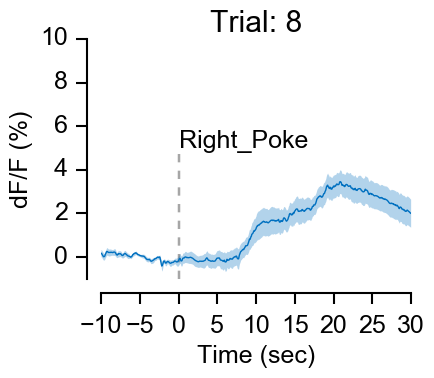

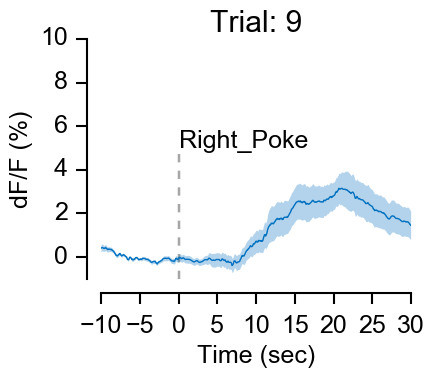

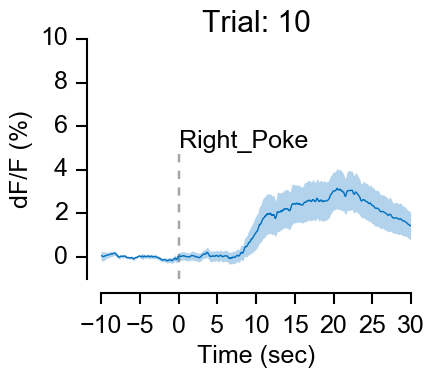

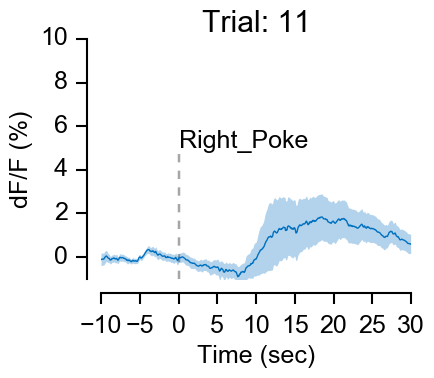

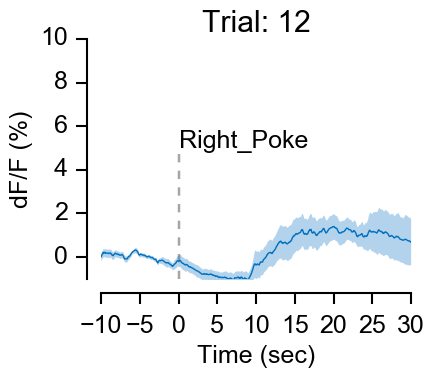

In [43]:
# Plot
for trial in range(trials[0], trials[1]+1):
    df = trialMeans[trialMeans['Trial'] == trial]
    fig, ax = plotMean(df['Mean'], df['Sem'], time)
    ax.set_title("Trial: " + str(trial))
    ax.set_ylim(-1,10)

In [55]:
str(len(eventsData.pivot_table(index=['Cell'], columns='New_Time').index)) + " cells in total."

'36 cells in total.'

In [83]:
startData = markTrials(mice, base, duration, eventType='Eat_Start', trials=trials, baseline=1)
contactData = markTrials(mice, base, duration, eventType='Food_Contact', trials=trials, baseline=1)

# Calculate the mean and sem
meanstart=startData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
semstart=startData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

meancontact=contactData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
semcontact=contactData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

time = np.arange(-base,duration,fs)

Number of successful rewards received (hits):  15
Number of missed rewards (misses):  2
Number of successful rewards received (hits):  17
Number of missed rewards (misses):  1
Number of successful rewards received (hits):  13
Number of missed rewards (misses):  2

3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.

Baseline was set 1 sec before the event.
Number of successful rewards received (hits):  15
Number of missed rewards (misses):  2
Number of successful rewards received (hits):  17
Number of missed rewards (misses):  1
Number of successful rewards received (hits):  13
Number of missed rewards (misses):  2

3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.

Baseline was set 1 sec before the event.


In [48]:
def plotMean(mean, sem, time):
    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    fig = plt.figure(figsize=(4,3), facecolor="w", dpi= 150)
    ax = plt.subplot(111)

    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

    ## labels
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("dF/F (%)")
    #ax.set_title("Aligned to event::Update the title", fontsize= 12)

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_top()
    ax.get_yaxis().tick_left()

    ## adjust the spines and ticks
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_linewidth(line)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_linewidth(line)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ## decorate the axes
    ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
    ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)

    ax.fill_between(time, mean+sem, mean-sem, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time, mean, colors[1], label=eventType)
    #ax.fill_between(time, meanstart+semstart, meanstart-semstart, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    #cat1, = ax.plot(time, meanstart, colors[1], label='Start')
    #ax.fill_between(time, meancontact+semcontact, meancontact-semcontact, facecolor=colors[0], linewidth=0, alpha=0.3, zorder=-5)
    #cat2, = ax.plot(time, meancontact, colors[0], label='Contact')

    ax.plot([0, 0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7, zorder=-56)
    ax.text(0, 5, eventType)
    #ax.set_ylim([-1., 2.])

    if False:
        ## add the legend
        ax.legend([cat1, cat2], ['Start', 'Contact'])
        handles, labels = ax.get_legend_handles_labels()
        legend = plt.legend(loc= 'upper left', fontsize= 18, handles=handles, handlelength= 1.2, handleheight= 0.8, handletextpad= 0.5, frameon= False)

    #plt.tight_layout()
    return fig, ax

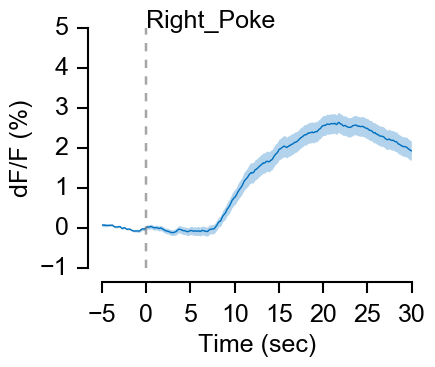

In [20]:
# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(-base,duration,fs)
fig, ax = plotMean(mean, sem, time)
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\right_poke_all_cell_means_10sec.svg")

In [23]:
boutsData = markBouts(mice, ['Eat_Start', 'Eat_End'], trials=[1,12], resample=1000)

Number of successful rewards received (hits):  15
Number of missed rewards (misses):  2
Number of successful rewards received (hits):  17
Number of missed rewards (misses):  1
Number of successful rewards received (hits):  13
Number of missed rewards (misses):  2
[ 0.27027027  0.23529412  0.22222222  0.30864198  0.29498525  0.28901734
  0.3003003   0.40650407  0.33112583  0.27173913  0.30959752  0.30769231
  0.3003003   0.3125      0.11273957]
[ 0.5         0.22988506  0.21691974  0.23980815  0.24752475  0.24630542
  0.26246719  0.25062657  0.26455026  0.25906736  0.24875622  0.26455026
  0.21413276  0.24154589]
[ 0.27932961  0.29761905  0.27100271  0.30769231  0.330033    0.5
  0.33333333  0.28490028  0.27855153  0.26595745  0.28409091  0.34364261]


500 32943


ValueError: Argument dimensions are incompatible

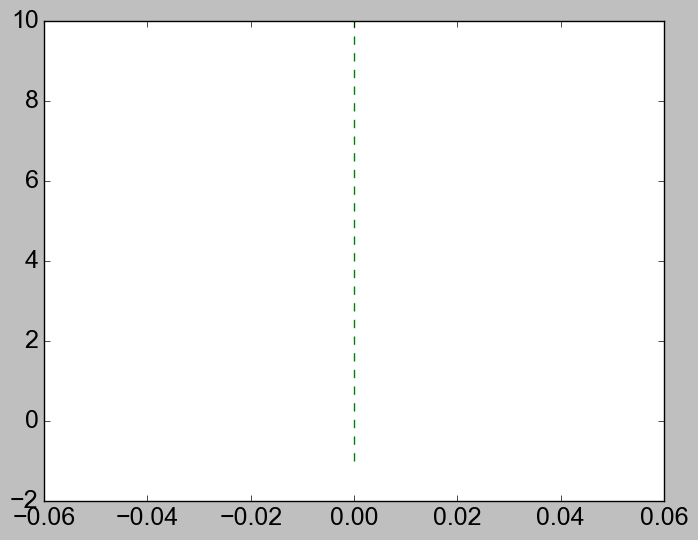

In [214]:
mean=boutsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=boutsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

time = np.arange(-base,duration,fs)
print len(time), len(mean)
plt.plot([0, 0],[-1, 10], 'g--')
plt.fill_between(time, mean+sem, mean-sem, facecolor='gray', linewidth=0, alpha=0.3, zorder=-5)
plt.plot(time, mean)

In [32]:
heatData = eventsData.pivot_table(index=['Event'], columns='New_Time', aggfunc=np.mean)
heatData['Fluoro'].columns
heatData.mean(axis=1)

Event
1     1.734500
2     1.599806
3     1.311978
4     1.142472
5    -0.356253
6     0.935967
7     1.469865
8     1.247995
9     1.077422
10    1.199844
11    0.521411
12    0.266527
dtype: float64

In [35]:
def plotHeat(eventsData):
    heatData = eventsData.pivot_table(index=['Event'], columns='New_Time', aggfunc=np.mean)
    heatData['Fluoro'].columns
    heatData.mean(axis=1)

    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    plt.figure(figsize=(6,5), facecolor="w", dpi= 150)
    ax = plt.subplot(111)

    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

    plt.pcolor(heatData, cmap=plt.cm.PiYG_r, linewidth=line, linestyle='solid')
    ax.invert_yaxis()
    plt.colorbar()

    ## labels
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Trial #')
    ax.set_title(eventType)


    ## decorate the axes
    #ax.tick_params(axis='y', color= '#000000', width= line, direction='in', length= 4, which='major', pad=10)
    #ax.tick_params(axis='x', color= '#000000', width= line, direction='in', length= 4, which='major', pad=12)
    time_ax = np.arange(-base, duration+0.001, 5.0)
    ax.set_xticks(np.linspace(0, (base+duration)/fs, len(time_ax)))
    ax.set_xticklabels(time_ax)
    ax.set_yticks(np.linspace(trials[0]-0.5, trials[1]-0.5, 2))
    ax.set_yticklabels(np.linspace(trials[0], trials[1], 2, dtype=int))

    ax.plot([base/fs, base/fs], list(ax.get_ylim()), 'w', linestyle='--', linewidth=line*1.2, alpha=1., zorder=111)
    
    return fig, ax

In [40]:
def plotMeanIn(mean, sem, time, trial, ax):
    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)


    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

    ## labels
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("dF/F (%)")
    #ax.set_title("Aligned to event::Update the title", fontsize= 12)

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_top()
    ax.get_yaxis().tick_left()

    ## adjust the spines and ticks
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_linewidth(line)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_linewidth(line)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ## decorate the axes
    ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
    ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)

    ax.fill_between(time, mean+sem, mean-sem, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time, mean, colors[1], label=eventType)
    #ax.fill_between(time, meanstart+semstart, meanstart-semstart, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    #cat1, = ax.plot(time, meanstart, colors[1], label='Start')
    #ax.fill_between(time, meancontact+semcontact, meancontact-semcontact, facecolor=colors[0], linewidth=0, alpha=0.3, zorder=-5)
    #cat2, = ax.plot(time, meancontact, colors[0], label='Contact')

    ax.plot([0, 0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
    ax.text(0, 5, eventType)
    #ax.set_ylim([-1., 2.])

    if False:
        ## add the legend
        ax.legend([cat1, cat2], ['Start', 'Contact'])
        handles, labels = ax.get_legend_handles_labels()
        legend = plt.legend(loc= 'upper left', fontsize= 18, handles=handles, handlelength= 1.2, handleheight= 0.8, handletextpad= 0.5, frameon= False)

    #plt.tight_layout()
    return fig, ax

NameError: name 'trialMeans' is not defined

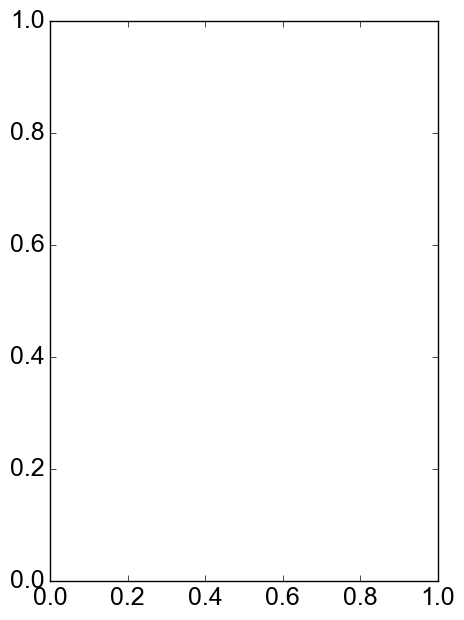

In [41]:
# Plot
fig = plt.figure(figsize=(5,7), facecolor="w", dpi= 150)
ax = plt.subplot(111)
f = 3
x_offset = np.arange(0.0, trials[1]*f, f)
y_offset = np.arange(0.0, trials[1]*f, f)

for i, trial in enumerate(range(trials[0], trials[1]+1)):
    df = trialMeans[trialMeans['Trial'] == trial]
    
    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

    ax.fill_between(time+x_offset[i], df['Mean']+df['Sem']-y_offset[i], df['Mean']-df['Sem']-y_offset[i], facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time+x_offset[i], df['Mean']-y_offset[i], colors[1], label=eventType)

ax.plot(x_offset, -y_offset, color= 'gray', linestyle='--', linewidth=line, alpha=0.7)
#ax.set_yticks(np.arange(-trials[1], -trials[0]+1, 1)*2)

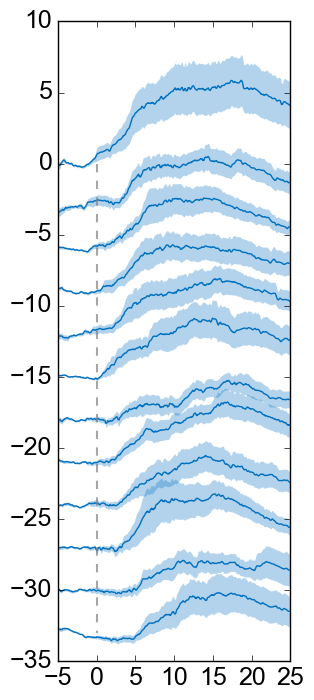

In [171]:
# Plot
fig = plt.figure(figsize=(3,8), facecolor="w", dpi= 150)
ax = plt.subplot(111)
f = 3
x_offset = np.arange(0.0, trials[1]*f, f)
y_offset = np.arange(0.0, trials[1]*f, f)

for i, trial in enumerate(range(trials[0], trials[1]+1)):
    df = trialMeans[trialMeans['Trial'] == trial]
    
    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

    ax.fill_between(time, df['Mean']+df['Sem']-y_offset[i], df['Mean']-df['Sem']-y_offset[i], facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time, df['Mean']-y_offset[i], colors[1], label=eventType)

ax.plot(x_offset*0, -y_offset, 'gray', linestyle='--', linewidth=line, alpha=0.7)
#ax.set_yticks(np.arange(-trials[1], -trials[0]+1, 1)*2)